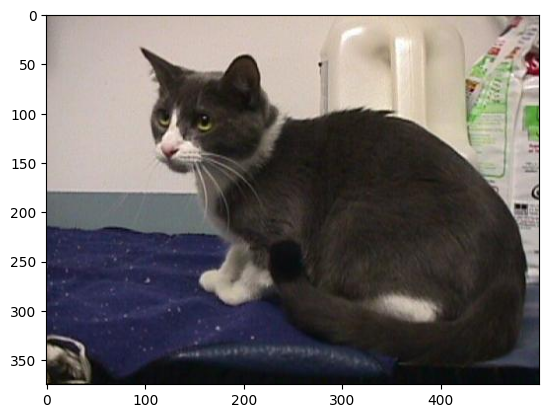

(375, 500, 3)


In [34]:
import matplotlib.pyplot as plt
import warnings
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

import cv2
%matplotlib inline

warnings.filterwarnings('ignore')

def show_image(img):
    plt.imshow(img)
    plt.show()
    
cat4 = cv2.cvtColor(cv2.imread("../Datasets/CATS_DOGS/train/CAT/4.jpg"), cv2.COLOR_BGR2RGB)

show_image(cat4)
print(cat4.shape)

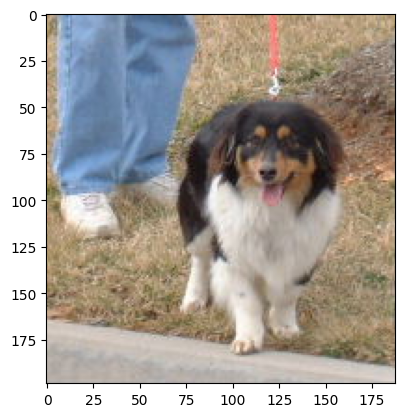

(199, 188, 3)


In [9]:
dog2 = cv2.cvtColor(cv2.imread("../Datasets/CATS_DOGS/train/DOG/2.jpg"), cv2.COLOR_BGR2RGB)

show_image(dog2)
print(dog2.shape)

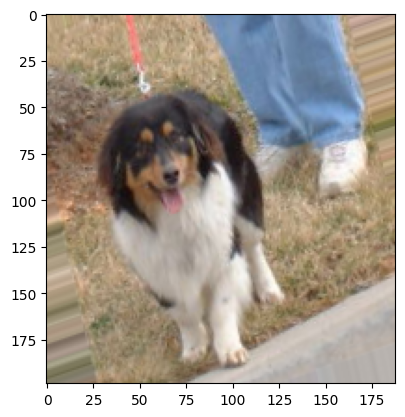

In [16]:
image_gen = ImageDataGenerator(rotation_range = 30, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               rescale=1/255, shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True,
                               fill_mode="nearest")

show_image(image_gen.random_transform(dog2))

In [19]:
print(image_gen.flow_from_directory("../Datasets/CATS_DOGS/train"))

Found 18743 images belonging to 2 classes.


In [28]:
input_shape = (150, 150, 3)
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 175232)            0         
                                                                 
 dense_1 (Dense)             (None, 128)               22429824  
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

In [29]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory("../Datasets/CATS_DOGS/train", 
                                                target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [30]:
batch_size = 16
test_image_gen = image_gen.flow_from_directory("../Datasets/CATS_DOGS/test", 
                                                target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [31]:
print(train_image_gen.class_indices)

{'CAT': 0, 'DOG': 1}


In [35]:
results = model.fit_generator(train_image_gen, epochs=1, steps_per_epoch=150,
                             validation_data=test_image_gen, validation_steps=12)

150/150 [==============================] - 42s 281ms/step - loss: 0.6867 - accuracy: 0.5571 - val_loss: 0.6877 - val_accuracy: 0.5990
